In [74]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import seaborn as sns

In [75]:
data = pd.read_csv('Admission_Predict_Ver1.1.csv')

In [76]:
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
Serial No.           500 non-null int64
GRE Score            500 non-null int64
TOEFL Score          500 non-null int64
University Rating    500 non-null int64
SOP                  500 non-null float64
LOR                  500 non-null float64
CGPA                 500 non-null float64
Research             500 non-null int64
Chance of Admit      500 non-null float64
dtypes: float64(4), int64(5)
memory usage: 35.2 KB


In [78]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [79]:
data.shape

(500, 9)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f377dd756a0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f3771635240>]], dtype=object)

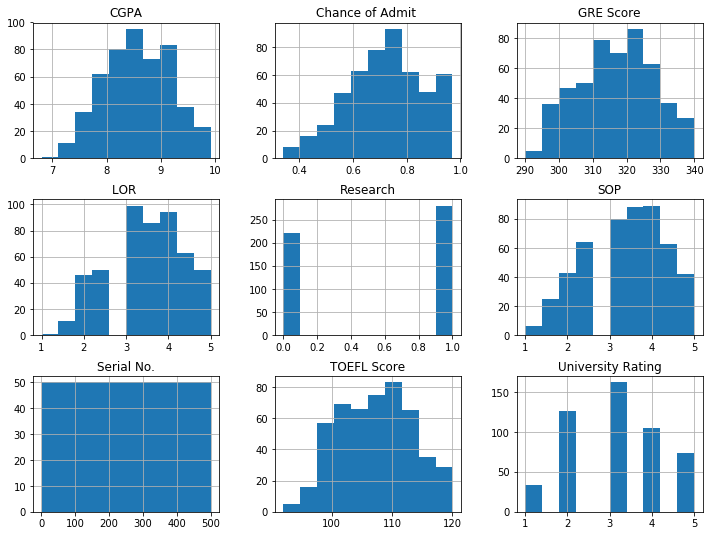

In [80]:
#plot histograms of each parameter
data.hist(figsize = (12,9))

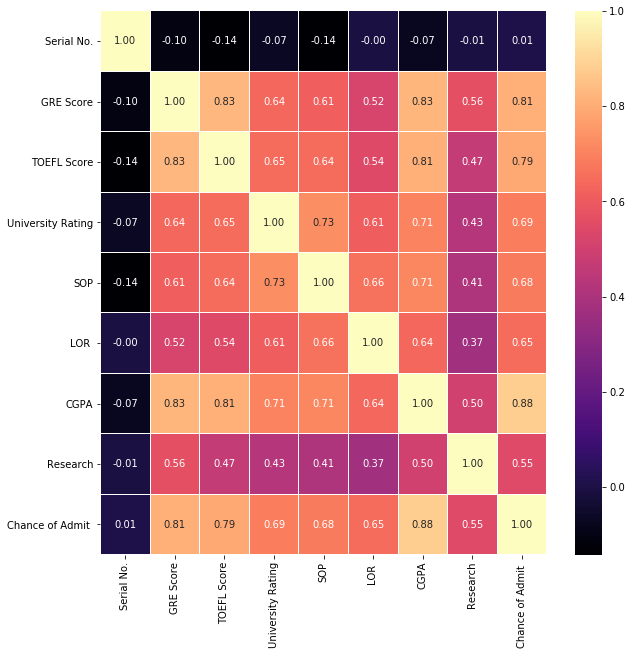

In [81]:
#Plot correlation matrix
#data.corr()
fig, ax = plt.subplots(figsize = (10,10))
sns.heatmap(data.corr(), ax =ax, annot = True, linewidths=0.05,fmt='.2f',cmap="magma")

# DATA VISUALIZATION
Comparing parameters to understand the data set

3 relations:
* How many students have research experience?
* GRE Score vs CGPA
* University Rating v Chance of Admit

Students with Research Exp: 280
Students without Research Exp: 220


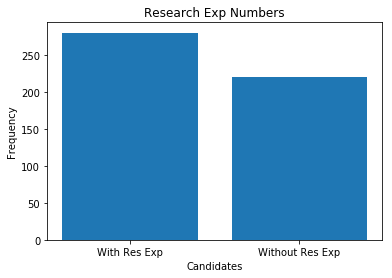

In [82]:
#Research experience

#Counting students with and without research experience
print("Students with Research Exp: {}".format(len(data[data.Research == 1])))
print("Students without Research Exp: {}".format(len(data[data.Research == 0])))

y = np.array([len(data[data.Research == 1]),len(data[data.Research == 0])])
x = ['With Res Exp','Without Res Exp'] 

plt.bar(x,y)
plt.title("Research Exp Numbers")
plt.xlabel("Candidates")
plt.ylabel("Frequency")
plt.show()

Text(0.5,1,'GRE Score vs CGPA')

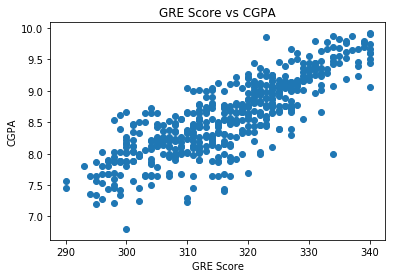

In [83]:
#Generally, students with higher GRE score have higher GPA
#Plot confirms above assumption

plt.scatter(data["GRE Score"],data["CGPA"])
plt.xlabel("GRE Score")
plt.ylabel("CGPA")
plt.title("GRE Score vs CGPA")

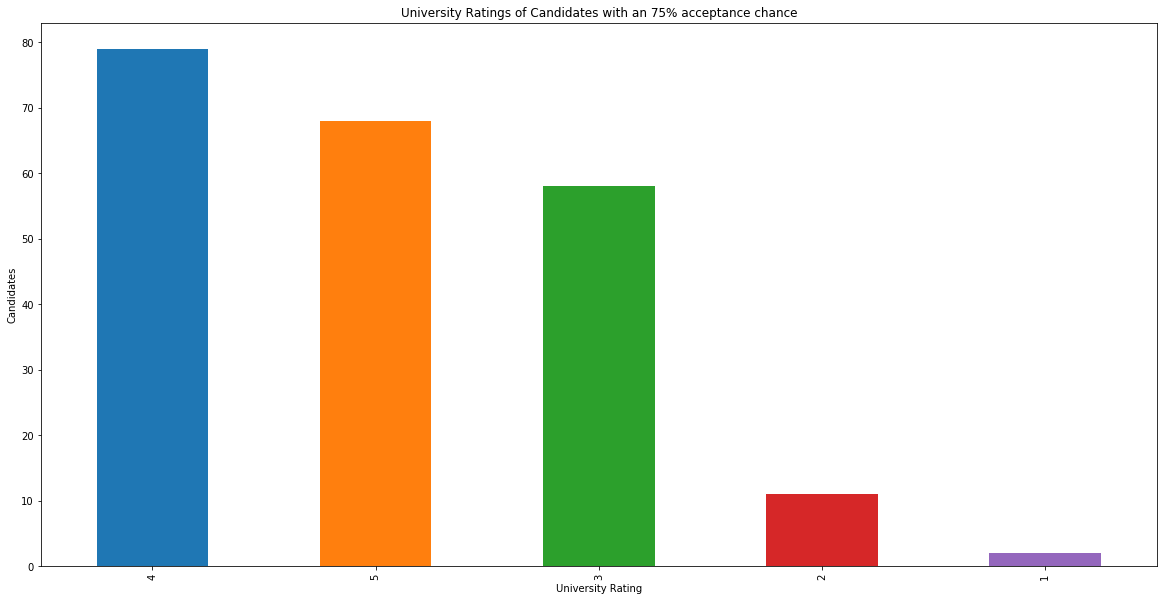

In [84]:
#Students from reputed universities have a better chance of getting accepted

s = data[data["Chance of Admit "] >= 0.75]["University Rating"].value_counts().head(5)
plt.title("University Ratings of Candidates with an 75% acceptance chance")
s.plot(kind='bar',figsize=(20, 10))
plt.xlabel("University Rating")
plt.ylabel("Candidates")
plt.show()

# PREDICTION ALGORITHMS

* Linear Regression
* CNN

Preprocessing

In [85]:
#drop serial no.
data.drop(["Serial No."], axis=1, inplace= True)

data=data.rename(columns = {'Chance of Admit ':'Chance of Admit'})

In [86]:
y = data["Chance of Admit"].values
x = data.drop(["Chance of Admit"],axis=1)

In [87]:
#Seperating training and test data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)
x_test

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
361,334,116,4,4.0,3.5,9.54,1
73,314,108,4,4.5,4.0,9.04,1
374,315,105,2,2.0,2.5,7.65,0
155,312,109,3,3.0,3.0,8.69,0
104,326,112,3,3.5,3.0,9.05,1
394,329,111,4,4.5,4.0,9.23,1
377,290,100,1,1.5,2.0,7.56,0
124,301,106,4,2.5,3.0,8.47,0
68,318,109,3,3.5,4.0,9.22,1
450,320,112,4,3.0,4.5,8.86,1


In [88]:
from sklearn.preprocessing import MinMaxScaler

scalerX = MinMaxScaler(feature_range = (0,1))
x_train = scalerX.fit_transform(x_train[x_train.columns])
x_test = scalerX.fit_transform(x_test[x_test.columns])

/home/anant/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/home/anant/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Linear Regression

In [89]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(x_train,y_train)
y_pred_lr = lr.predict(x_test)

for i in range(0,(len(y_pred_lr)//10)):
    print(f"Real Val: {y_test[i]}\tPrediction: {y_pred_lr[i]}")

Real Val: 0.93	Prediction: 0.9230168188166697
Real Val: 0.84	Prediction: 0.7865632217083619
Real Val: 0.39	Prediction: 0.5249766872690043
Real Val: 0.77	Prediction: 0.6904507732110425
Real Val: 0.74	Prediction: 0.8101652583427391
Real Val: 0.89	Prediction: 0.8595165753516758
Real Val: 0.47	Prediction: 0.4247197535691507
Real Val: 0.57	Prediction: 0.6246156075493832
Real Val: 0.68	Prediction: 0.8207144291847861
Real Val: 0.82	Prediction: 0.7927291514793104


In [90]:
from sklearn.metrics import r2_score

print(f"r_squared_score: {r2_score(y_test,y_pred_lr)}")

r_squared_score: 0.7855357095907826


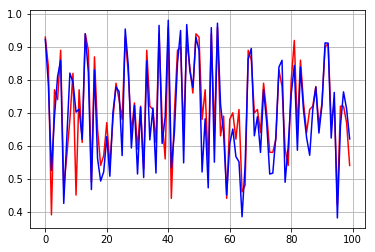

In [91]:
#Plotting predicted values alongside actual values

plt.plot(y_test, 'r', y_pred_lr, 'b')
plt.grid()
plt.figure(figsize=(100,100))

In [100]:
#CNN

import tensorflow as tf
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

x_train.shape

model = tf.keras.models.Sequential()



Epoch 1/3
400/400 [==============================] - 1s 3ms/step - loss: 0.0000e+00 - acc: 0.0000e+00
Epoch 2/3
400/400 [==============================] - 0s 38us/step - loss: 0.0000e+00 - acc: 0.0000e+00
Epoch 3/3
400/400 [==============================] - 0s 64us/step - loss: 0.0000e+00 - acc: 0.0000e+00
